<a href="https://colab.research.google.com/github/AkshitaPatel/Image-Processing/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import cv2
import numpy as np

**Importing Bracketed Images**

In [3]:
img_bright = cv2.imread('/content/gdrive/MyDrive/HDR Samples/bright.jpg')
img_dark = cv2.imread('/content/gdrive/MyDrive/HDR Samples/dark.jpg')
img_normal = cv2.imread('/content/gdrive/MyDrive/HDR Samples/normal.jpg')

In [4]:
image_list = [img_bright,img_normal,img_dark]

In [5]:
img_bright_rgb = cv2.cvtColor(img_bright,cv2.COLOR_BGR2RGB)
img_dark_rgb = cv2.cvtColor(img_dark,cv2.COLOR_BGR2RGB)
img_normal_rgb = cv2.cvtColor(img_normal,cv2.COLOR_BGR2RGB)

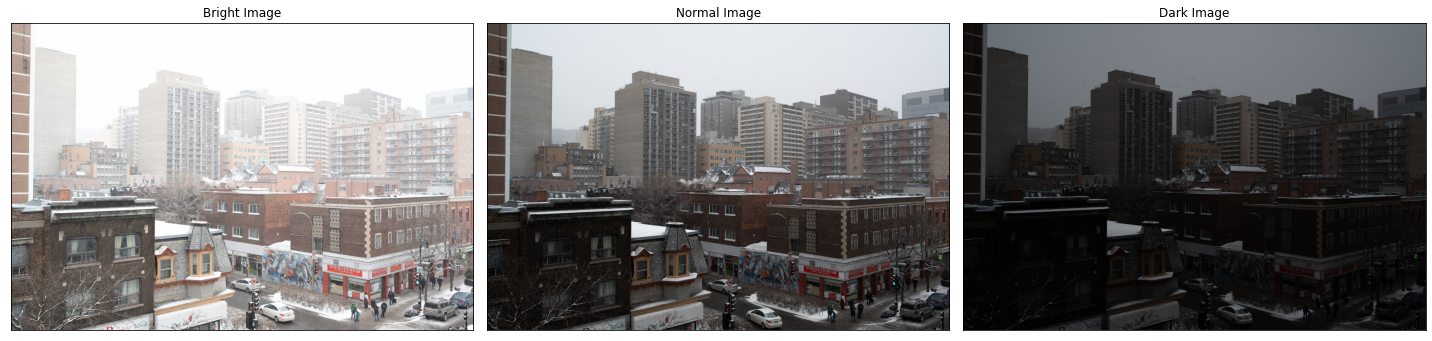

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_bright_rgb)
plt.title('Bright Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_normal_rgb)
plt.title('Normal Image')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_dark_rgb)
plt.title('Dark Image')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

**Aligning Images**

In [7]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(image_list, image_list)


# **EXPOSURE FUSION**



**Merging Images**



In [8]:
mergeMertens = cv2.createMergeMertens()
exposureFusion = mergeMertens.process(image_list)


**Converting result to an 8-bit image**

In [9]:
result_8bit = np.clip(exposureFusion*255, 0, 255).astype('uint8')

In [10]:
cv2.imwrite("fusion_result.jpg",result_8bit)

True

# **HIGH DYNAMIC RANGE**

In [11]:
img_bright = cv2.imread('/content/gdrive/MyDrive/HDR Samples/bright.jpg')
img_dark = cv2.imread('/content/gdrive/MyDrive/HDR Samples/dark.jpg')
img_normal = cv2.imread('/content/gdrive/MyDrive/HDR Samples/normal.jpg')
image_list = [img_normal,img_dark,img_bright]

**Reading Shutter Speed of the Images**

In [12]:
from PIL import Image
from PIL.ExifTags import TAGS

In [13]:
image_normal = Image.open('/content/gdrive/MyDrive/HDR Samples/normal.jpg')
image_dark = Image.open('/content/gdrive/MyDrive/HDR Samples/dark.jpg')
image_bright = Image.open('/content/gdrive/MyDrive/HDR Samples/bright.jpg')
img_list = [image_normal,image_dark,image_bright]

In [14]:
shutter_speeds = []
for img in img_list:
  exifdata = img.getexif()
  temp = exifdata.get(33434)
  shutter_speeds.append(temp[0]/temp[1])


In [15]:
exposure_times = np.array(shutter_speeds, dtype=np.float32)

**Aligning Images**

In [16]:
alignMTB_1 = cv2.createAlignMTB()
alignMTB_1.process(image_list, image_list)


**Merging Images**

In [17]:
merge_debevec = cv2.createMergeDebevec()
hdr_debevec = merge_debevec.process(image_list, times=exposure_times.copy())

**Tone Mapping : Drago Tonemap**

In [18]:
tonemapDrago = cv2.createTonemapDrago(1.0, 0.5)
ldrDrago = tonemapDrago.process(hdr_debevec)
cv2.imwrite("ldr-Drago-11.jpg", ldrDrago * 255)


True

**Tone Mapping : Reinhard Tonemap**

In [19]:
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdr_debevec)
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)


True

**Comparison: Tone Mapping Methods**

In [20]:
ldrTM_drago = cv2.cvtColor(ldrDrago,cv2.COLOR_BGR2RGB)
ldrTM_reinhard = cv2.cvtColor(ldrReinhard,cv2.COLOR_BGR2RGB)

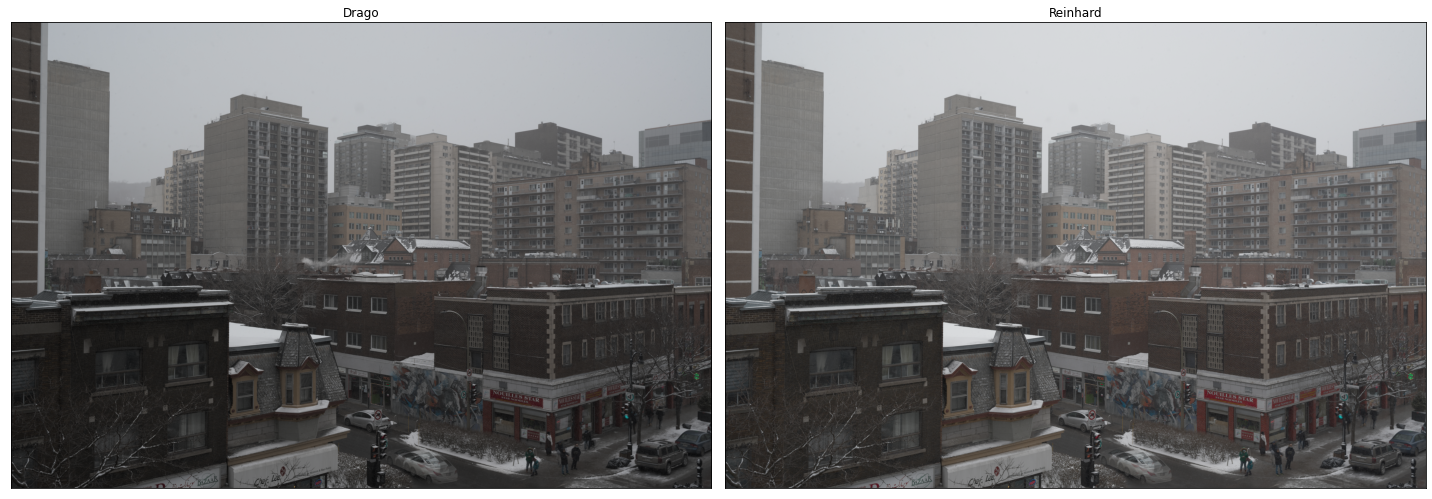

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(ldrTM_drago)
plt.title('Drago')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(ldrTM_reinhard)
plt.title('Reinhard')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

**Comparison: With and Without alignment**


In [22]:
img_bright_1 = cv2.imread('/content/gdrive/MyDrive/HDR Samples/bright.jpg')
img_dark_1 = cv2.imread('/content/gdrive/MyDrive/HDR Samples/dark.jpg')
img_normal_1 = cv2.imread('/content/gdrive/MyDrive/HDR Samples/normal.jpg')
image_list_1 = [img_normal_1,img_dark_1,img_bright_1]


In [23]:
merge_debevec_1 = cv2.createMergeDebevec()
hdr_debevec_1 = merge_debevec_1.process(image_list_1, times=exposure_times.copy())


In [24]:
tonemapDrago_1 = cv2.createTonemapDrago(1.0, 0.5)
ldrDrago_1 = tonemapDrago.process(hdr_debevec_1)



In [25]:
ldrDrago_rgb = cv2.cvtColor(ldrDrago,cv2.COLOR_BGR2RGB)
ldrDrago_rgb_1 = cv2.cvtColor(ldrDrago_1,cv2.COLOR_BGR2RGB)

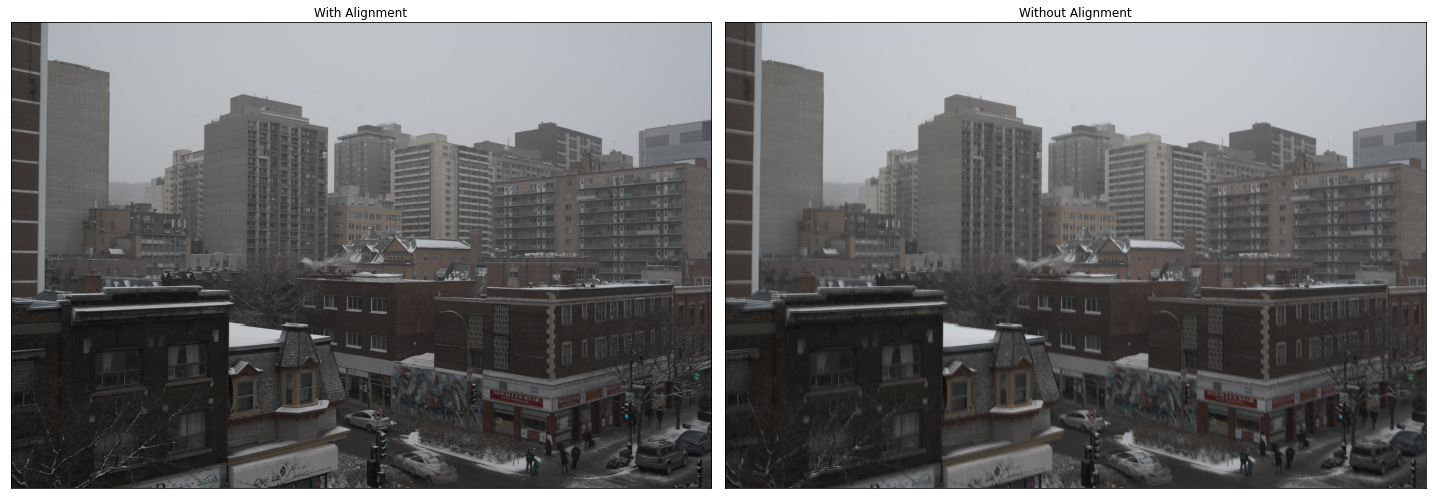

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(ldrDrago_rgb)
plt.title('With Alignment')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(ldrDrago_rgb_1)
plt.title('Without Alignment')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()